In [2]:
# """

# 1.) Read in from ../Documents/fx_data (use EURJPY)
# 2.) Create class for backtester
# 3.) Create other class for engulf levels.
#     a.) Each 4h engulf inst class
#     b.) drill down into 15m / 5m / 1m (multiple levels)
#     c.) note time and # of touches
#     d.) default amt to deactivate level
#     e.) track MAE/MFE after activation
# 4.) Create backtester class
#     a.) for each bar, check if any active levels were hit
#     b.) note within those levels (the level class)
#     c.) otherwise iterate through activated levels and note MFE/MAE
#     d.) if level is hit more than threshold, deactivate level class
# 5.) at the end check everything, look at "alignments", dow, time of day, range (1h 4h 1d 1w 1m) prior, get stats

# How to handle resampling? (want to check on 1m, 5m, 15m, 4h, 1d)

# """

In [3]:
import os
import pandas as pd
from tqdm.notebook import tqdm
from datetime import datetime
import ciso8601

In [4]:
def process(data):
    data['mid'] = (data[1]+data[2])/2
    data.drop(columns=[1, 2, 3, 4], inplace=True)
    data.columns = ['time', 'mid']
    data['time'] = data['time'].apply(lambda x: ciso8601.parse_datetime(x))
    data.set_index('time', inplace=True)
    return data

In [16]:
path = '../fx_data/'
inst = 'EURJPY'
data = pd.DataFrame()
for _ in tqdm([_ for _ in os.listdir(path) if inst in _]):
    if os.path.getsize(path + _) > 0:
        n = pd.read_csv(path + _, header=None)
        n = process(n)
        n = n['mid'].resample('1T').ohlc()
        data = pd.concat([
            data,
            n
        ])
        data = data.drop_duplicates()

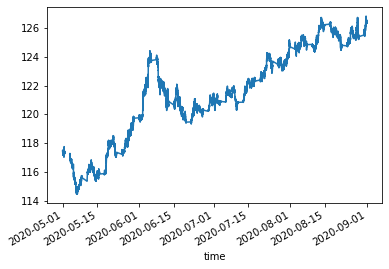

In [20]:
data['close'].plot()

In [178]:
# # show breakdown of gaps
# data['time'] = data.index
# data['time'] = data['time'].diff()
# print(round(data['time'].value_counts()/len(data)*100, 2))
# data.drop(columns=['time'], inplace=True)

In [214]:
# pretty sure aligning to nearest 00:00 or 12:00, so static 2h is fine

# not sure how to reconcile dukas server time w/TV (FXCM)

t = data.resample(
    '4H', 
    offset='2H'
).agg(
    {
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'max'
    }
)

# t.head(10)

# t.head(20).plot()

In [ ]:
# # from "fx engulf.ipynb" #1:

# rs['ch'] = rs['close'] - rs['open']
# rs.loc[(rs['ch'].shift() > 0) & (rs['ch'] < 0) & (abs(rs['ch']) > abs(rs['ch'].shift())), 'sig'] = True
# rs.loc[(rs['ch'].shift() < 0) & (rs['ch'] > 0) & (abs(rs['ch']) > abs(rs['ch'].shift())), 'sig'] = True

In [179]:
# plt.figure(figsize=(23, 17))
# i, j = '2020-08-10', '2020-08-13'
# # data[['bid', 'ask']][-130000:].plot(alpha=.8, figsize=(23, 17))
# data.loc[(data.index > i) & (data.index < j), ['bid', 'ask']].resample('5T').last().plot(alpha=.8, figsize=(23, 17))
# plt.scatter(
#     rs.loc[(rs['sig'] == True) & (rs['ch'] < 0), 'close'][:].index + timedelta(seconds=60*60), 
#     rs.loc[(rs['sig'] == True) & (rs['ch'] < 0), 'close'][:], alpha=.5, color='red', s=500
# )
# plt.scatter(
#     rs.loc[(rs['sig'] == True) & (rs['ch'] < 0), 'open'][:].index, 
#     rs.loc[(rs['sig'] == True) & (rs['ch'] < 0), 'open'][:], alpha=.5, color='red', s=500
# )
# plt.scatter(
#     rs.loc[(rs['sig'] == True) & (rs['ch'] > 0), 'close'][:].index + timedelta(seconds=60*60), 
#     rs.loc[(rs['sig'] == True) & (rs['ch'] > 0), 'close'][:], alpha=.5, color='green', s=500
# )
# plt.scatter(
#     rs.loc[(rs['sig'] == True) & (rs['ch'] > 0), 'open'][:].index, 
#     rs.loc[(rs['sig'] == True) & (rs['ch'] > 0), 'open'][:], alpha=.5, color='green', s=500
# )
# plt.xlim(i, j)
# plt.ylim(data.loc[(data.index > i) & (data.index < j), 'mid'].agg(['min', 'max']).values)
# plt.show();